# 

# Compare flat and PostISRCCD

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch


In [2]:
import os
from astropy.io import fits
from astropy.time import Time

In [3]:
transform = AsinhStretch() + PercentileInterval(99.)

# Inputs

## Input flat

In [4]:
!ls ../special_flats_median_smoothing/special_flats/20230116/2023011600015

flat_2023011600015_empty_1.fits
special_flat_2023011600015_empty_1_ws_40.fits
special_flat_2023011600015_empty_1_ws_40-good.fits
special_flat_2023011600015_empty_1_ws_40.png
ws_analysis


In [5]:
path = "../special_flats_median_smoothing/special_flats/20230116/2023011600015"
filename = "special_flat_2023011600015_empty_1_ws_40.fits"

In [6]:
fullfilename = os.path.join(path,filename)

In [7]:
hdu = fits.open(fullfilename)

In [8]:
hdu.info()

Filename: ../special_flats_median_smoothing/special_flats/20230116/2023011600015/special_flat_2023011600015_empty_1_ws_40.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     248   ()      
  1                1 ImageHDU         7   (4072, 4000)   float32   


In [9]:
data1 = hdu[1].data

## Input postisrccd

In [10]:
ls ../GeneratepseudoPostISRCCD/dm_postisrccd_img/collimator~holo4_003/20230914

exposure_2023091400094_dmpostisrccd.fits
exposure_2023091400095_dmpostisrccd.fits
exposure_2023091400108_dmpostisrccd.fits
exposure_2023091400109_dmpostisrccd.fits
exposure_2023091400120_dmpostisrccd.fits
exposure_2023091400121_dmpostisrccd.fits
exposure_2023091400132_dmpostisrccd.fits
exposure_2023091400133_dmpostisrccd.fits
exposure_2023091400145_dmpostisrccd.fits
exposure_2023091400146_dmpostisrccd.fits
exposure_2023091400157_dmpostisrccd.fits
exposure_2023091400158_dmpostisrccd.fits
exposure_2023091400169_dmpostisrccd.fits
exposure_2023091400170_dmpostisrccd.fits
exposure_2023091400182_dmpostisrccd.fits
exposure_2023091400183_dmpostisrccd.fits
exposure_2023091400194_dmpostisrccd.fits
exposure_2023091400195_dmpostisrccd.fits
exposure_2023091400215_dmpostisrccd.fits
exposure_2023091400216_dmpostisrccd.fits
exposure_2023091400227_dmpostisrccd.fits
exposure_2023091400228_dmpostisrccd.fits
exposure_2023091400239_dmpostisrccd.fits
exposure_2023091400240_dmpostisrccd.fits
exposure_2023091

In [11]:
path = "../GeneratepseudoPostISRCCD/dm_postisrccd_img/collimator~holo4_003/20230914"
filename = "exposure_2023091400157_dmpostisrccd.fits"

filename_out_v1 = "exposure_2023091400157_flatten_v1.fits"
filename_out_v2 = "exposure_2023091400157_flatten_v2.fits"

In [12]:
fullfilename = os.path.join(path,filename)
fullfilename

'../GeneratepseudoPostISRCCD/dm_postisrccd_img/collimator~holo4_003/20230914/exposure_2023091400157_dmpostisrccd.fits'

In [13]:
hdu = fits.open(fullfilename)

In [14]:
hdu.info()

Filename: ../GeneratepseudoPostISRCCD/dm_postisrccd_img/collimator~holo4_003/20230914/exposure_2023091400157_dmpostisrccd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  REB_COND      1 PrimaryHDU     208   ()      
  1                1 ImageHDU         7   (4072, 4000)   float32   


In [15]:
hdr2 = hdu[0].header
data2 = hdu[1].data

In [16]:
hdr2

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CCD_MANU= 'ITL     '                                                            
CCD_TYPE= '3800C   '                                                            
DETSIZE = '[1:4072,1:4000]'                                                     
BINX    =                    1                                                  
BINY    =                    1                                                  
CCDGAIN =                  1.0                                                  
CCDNOISE=                 10.0                                                  
CCDSLOT = 'S00     '                                                            
RAFTBAY = 'R00     '        

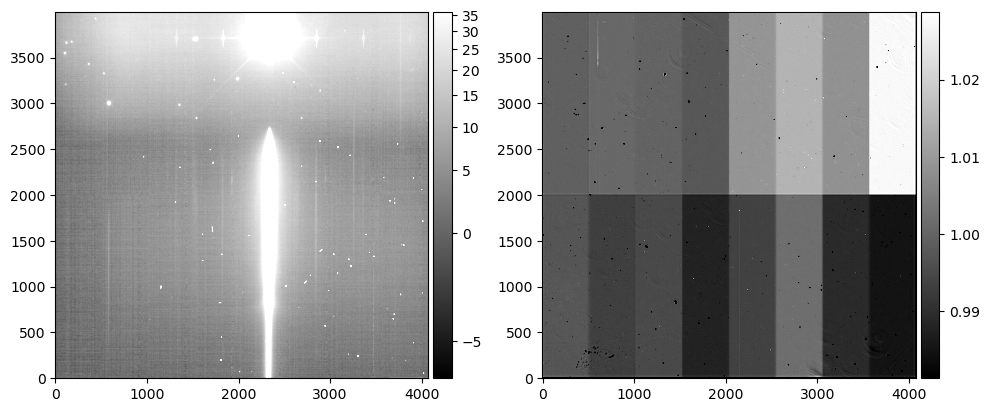

In [17]:
# Create an ImageNormalize object
fig ,axs =plt.subplots(1,2,figsize=(10,5))

ax1=axs[0]

norm = ImageNormalize(data2, interval=PercentileInterval(90.),stretch=AsinhStretch())
im1 = ax1.imshow(data2,origin="lower",norm=norm,cmap="gray")
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2=axs[1]
norm = ImageNormalize(data1, interval=PercentileInterval(95.))
im2=ax2.imshow(data1,origin="lower",norm=norm,cmap="gray")
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical');


plt.tight_layout()

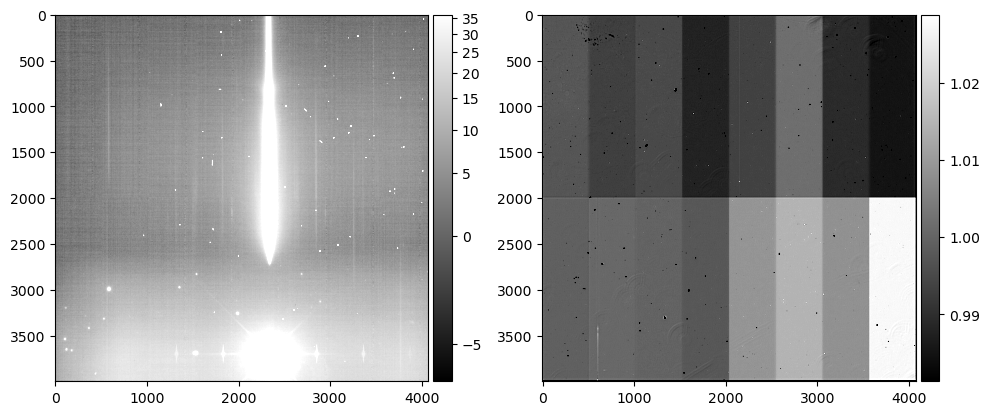

In [18]:
# Create an ImageNormalize object
fig ,axs =plt.subplots(1,2,figsize=(10,5))

ax1=axs[0]

norm = ImageNormalize(data2, interval=PercentileInterval(90.),stretch=AsinhStretch())
im1 = ax1.imshow(data2,norm=norm,cmap="gray")
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2=axs[1]
norm = ImageNormalize(data1, interval=PercentileInterval(95.))
im2=ax2.imshow(data1,norm=norm,cmap="gray")
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical');


plt.tight_layout()

In [19]:
image_flat_v1 = data2/data1
image_flat_v2 = data2/np.flipud(data1)

In [20]:
primary_hdu = fits.PrimaryHDU(header=hdr2)
image_hdu = fits.ImageHDU(image_flat_v1)
hdu_list = fits.HDUList([primary_hdu, image_hdu])
hdu_list.writeto(filename_out_v1,overwrite=True)

In [21]:
primary_hdu = fits.PrimaryHDU(header=hdr2)
image_hdu = fits.ImageHDU(image_flat_v2)
hdu_list = fits.HDUList([primary_hdu, image_hdu])
hdu_list.writeto(filename_out_v2,overwrite=True)